Iteration 0: Loss = 0.6931
Iteration 150: Loss = 0.0133
Iteration 300: Loss = 0.0073
Iteration 450: Loss = 0.0052
Iteration 600: Loss = 0.0041
Iteration 750: Loss = 0.0034
Iteration 900: Loss = 0.0029
Iteration 1050: Loss = 0.0025
Iteration 1200: Loss = 0.0022
Iteration 1350: Loss = 0.0020

Final Accuracy: 100.00%


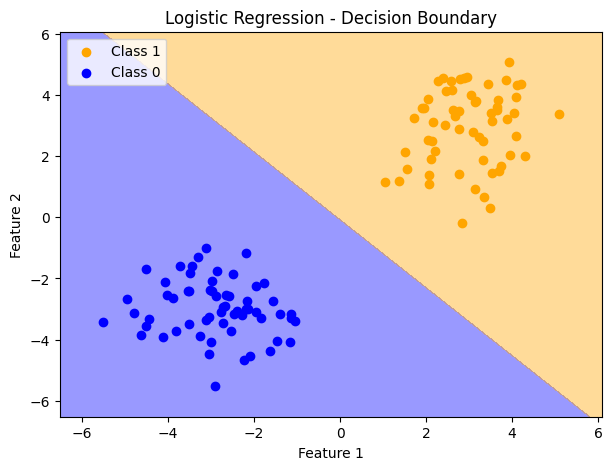

In [7]:
# Start the program
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
# Step 2: Generate synthetic data (2D binary classification)
np.random.seed(20)
class1 = np.random.randn(60, 2) + np.array([3, 3])
class2 = np.random.randn(60, 2) + np.array([-3, -3])
X = np.vstack((class1, class2))
y = np.hstack((np.ones(60), np.zeros(60)))
10
# Step 3: Add bias term (for intercept)
X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # shape: (120, 3)
# Step 4: Define the Sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
# Step 5: Define the Binary Cross-Entropy Loss
def compute_loss(y, y_pred):
 return -np.mean(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
# Step 6: Training function using Gradient Descent
def train_model(X, y, learning_rate=0.05, iterations=1500):
 weights = np.zeros(X.shape[1])
 for i in range(iterations):
  z = X @ weights
  predictions = sigmoid(z)
  gradient = X.T @ (predictions - y) / y.size
  weights -= learning_rate * gradient
  if i % 150 == 0:
       print(f"Iteration {i}: Loss = {compute_loss(y, predictions):.4f}")
 return weights
# Step 7: Train the logistic regression model
final_weights = train_model(X_bias, y)
# Step 8: Define prediction function
def predict(X, weights):
 return sigmoid(X @ weights) >= 0.5
# Step 9: Predict and calculate accuracy
predictions = predict(X_bias, final_weights)
accuracy = np.mean(predictions == y)
print(f"\nFinal Accuracy: {accuracy * 100:.2f}%")
# Step 10: Plot the decision boundary
x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 120),
np.linspace(x2_min, x2_max, 120))
grid_points = np.c_[np.ones(xx1.ravel().shape), xx1.ravel(), xx2.ravel()]
probs = sigmoid(grid_points @ final_weights).reshape(xx1.shape)
plt.figure(figsize=(7,5))
plt.contourf(xx1, xx2, probs, levels=[0, 0.5, 1], alpha=0.4, colors=['blue', 'orange'])
plt.scatter(class1[:, 0], class1[:, 1], color='orange', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], color='blue', label='Class 0')
plt.title("Logistic Regression - Decision Boundary")
11
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
# End the program